# District heating areas in Denmark

```{post} 2023-04-14
:tags: open science
:author: Adam R. Jensen
:image: 2
```

This blog posts demonstrates how to generate a map of the district heating areas in Denmark. Pretty expansive coverage don't ya think?

Vector data of the district heating areas can be obtained from [PlanData.dk](https://kort.plandata.dk). To download the district heating area shapefiles, select "Værktøjer" then click "Download tema" and tick the box "Forsyningsområde, vedtaget".

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

In [2]:
# Read data using geopandas
df_dh = gpd.read_file("../data/danish_district_heating_areas.shp")

# Only select district heating areas
df_dh = df_dh[df_dh['vaerdi1203'] == 'Fjernvarme']

# Convert to a different CRS
df_dh = df_dh.to_crs(epsg=4326)

<br>

## Nation wide

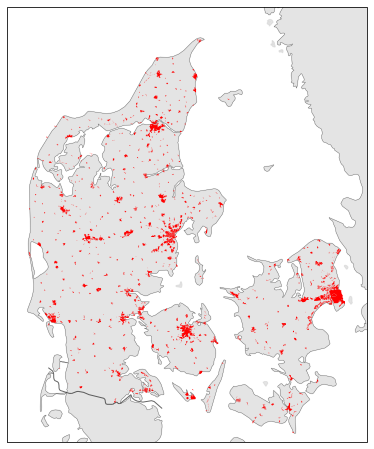

In [3]:
plt.figure(figsize=(8, 8))

proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

ax.add_feature(cfeature.COASTLINE, lw=0.2)
ax.add_feature(cfeature.LAND, alpha=0.6, facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS, alpha=0.6, edgecolor='black')

df_dh['geometry'].plot(ax=ax, facecolor='r')
ax.set_extent([7.8, 13, 54.5, 58])

<br>

## Copenhagen district heating area


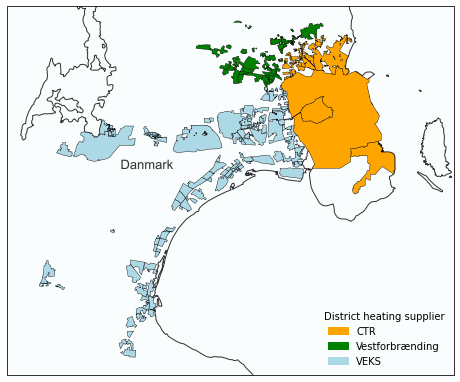

In [7]:
ctr_kommuner = ['Gentofte kommune', 'Gladsaxe kommune', 'Københavns kommune', 'Frederiksberg kommune', 'Tårnby kommune']
veks_kommuner = ['Glostrup kommune', 'Roskilde kommune', 'Høje-Taastrup kommune', 'Albertslund kommune', 'Brøndby kommune', 'Hvidovre kommune',
                 'Køge kommune', 'Solrød kommune', 'Greve kommune', 'Ishøj kommune', 'Vallensbæk kommune', 'Rødovre kommune']

df_dh_ctr = df_dh[df_dh['cvrname'].isin(ctr_kommuner)]
df_dh_veks = df_dh[df_dh['cvrname'].isin(veks_kommuner)]
df_dh_vest = df_dh[df_dh['forsytekst'] == 'I/S Vestforbrændingen']

plt.figure(figsize=(8, 8))

proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.05)

token = os.environ.get('DAGI_DAF_WMS')

ax.add_wms(wms=f"https://api.dataforsyningen.dk/dagi_DAF?service=WMS&request=GetCapabilities&token={token}",
               layers=['Danmark'], zorder=0, alpha=0.8)

params = {'lw': 0.4, 'edgecolor': 'k'}
df_dh_ctr['geometry'].plot(ax=ax, color='orange', **params, label='CTR')
df_dh_vest['geometry'].plot(ax=ax, color='green', **params, label='Vestforbrænding')
df_dh_veks['geometry'].plot(ax=ax, color='lightblue', **params, label='VEKS')
ax.set_extent([11.9, 12.8, 55.38, 55.8])

handles = [mpatches.Patch(color='orange', label='CTR'),
           mpatches.Patch(color='green', label='Vestforbrænding'),
           mpatches.Patch(color='lightblue', label='VEKS')]
ax.legend(handles=handles, loc='lower right', frameon=False, title='District heating supplier')
plt.show()

Note the map is not completly perfect. In particular, there are some disconnected district heating areas denoted as VEKS that are in fact separate areas.